In [10]:
from lib.utils import *
from lib.models import *
from lib.ekyn import *
from lib.env import *
from lib.datasets import Dataset2p0

In [11]:
folds = get_leave_one_out_cv_ids_for_ekyn()
criterion = torch.nn.CrossEntropyLoss()
all_metrics = pd.DataFrame()

In [15]:
for i,(train_ids,test_ids) in tqdm(enumerate(folds)):
    print(test_ids)
    X_test,y_test = load_psd_label_pairs_windowed(test_ids)
    testloader = DataLoader(Dataset2p0(dir=f'../data/w1_cv_{i}/dev',labels=f'../data/w1_cv_{i}/y_dev.pt'),batch_size=32,shuffle=True)
    model = ResNetSmall(n_features=5000,device=DEVICE)
    model.load_state_dict(torch.load(f=f'../runs/raw_resnet_small_cv_fold_{i}/best_model.pt',map_location='cpu'))
    model.to(DEVICE)
    loss,metrics,y_true,y_pred,logits = evaluate(testloader,model,criterion,DEVICE)
    all_metrics = pd.concat([all_metrics,pd.Series(metrics,name=f'{i}')],axis=1)

0it [00:00, ?it/s]

['E2-1']


/home/andrew/.local/lib/python3.10/site-packages/torch/nn/modules/conv.py:309: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at ../aten/src/ATen/native/Convolution.cpp:895.)
  return F.conv1d(input, weight, bias, self.stride,
1it [00:26, 26.51s/it]

['F1-1']


2it [00:51, 25.62s/it]

['C1-0']


3it [01:16, 25.26s/it]

['A1-1']


4it [01:41, 25.32s/it]

['E1-0']


5it [02:06, 24.98s/it]

['A4-0']


6it [02:31, 25.03s/it]

['B1-0']


7it [02:56, 24.97s/it]

['E4-0']


8it [03:21, 25.09s/it]

['F1-0']


9it [03:46, 25.16s/it]

['C4-1']


10it [04:11, 25.00s/it]

['D1-0']


11it [04:35, 24.72s/it]

['B3-1']


12it [05:00, 24.86s/it]

['A1-0']


13it [05:26, 25.05s/it]

['C4-0']


14it [05:51, 25.19s/it]

['F5-1']


15it [06:15, 24.82s/it]

['E4-1']


16it [06:38, 24.93s/it]


In [16]:
all_metrics.T.describe()

,precision,recall,f1
count,16.000000,16.000000,16.000000
mean,0.864548,0.854359,0.859195
std,0.004766,0.006964,0.003874
min,0.851586,0.837961,0.851735
25%,0.861890,0.851162,0.857235
50%,0.865654,0.855636,0.859726
75%,0.867869,0.858680,0.860831
max,0.869810,0.867260,0.866751


<AxesSubplot:xlabel='value', ylabel='variable'>

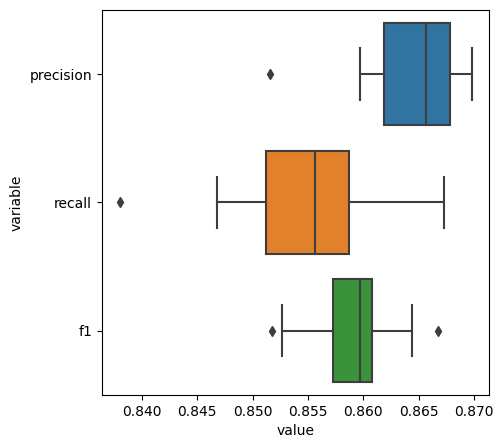

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))

<AxesSubplot:xlabel='value', ylabel='variable'>

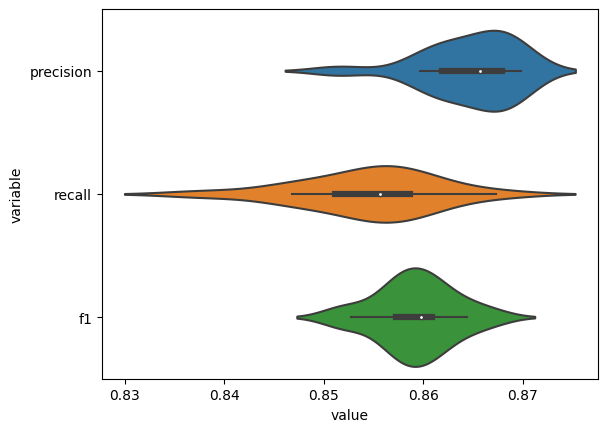

In [18]:
sns.violinplot(data=all_metrics.T.melt(),x='value',y='variable')

<AxesSubplot:xlabel='precision', ylabel='Density'>

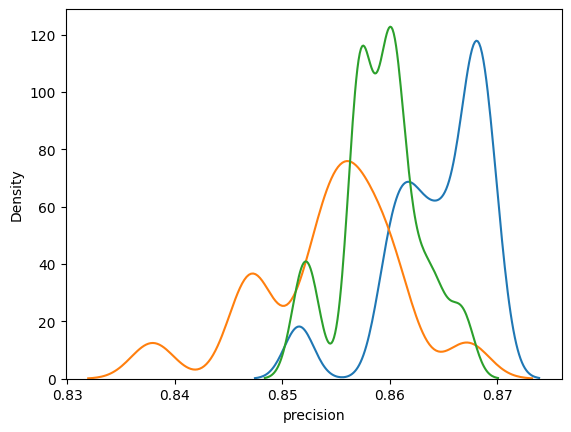

In [19]:
sns.kdeplot(all_metrics.T['precision'],bw_adjust=.5)
sns.kdeplot(all_metrics.T['recall'],bw_adjust=.5)
sns.kdeplot(all_metrics.T['f1'],bw_adjust=.5)

Text(0, 0.5, 'score')

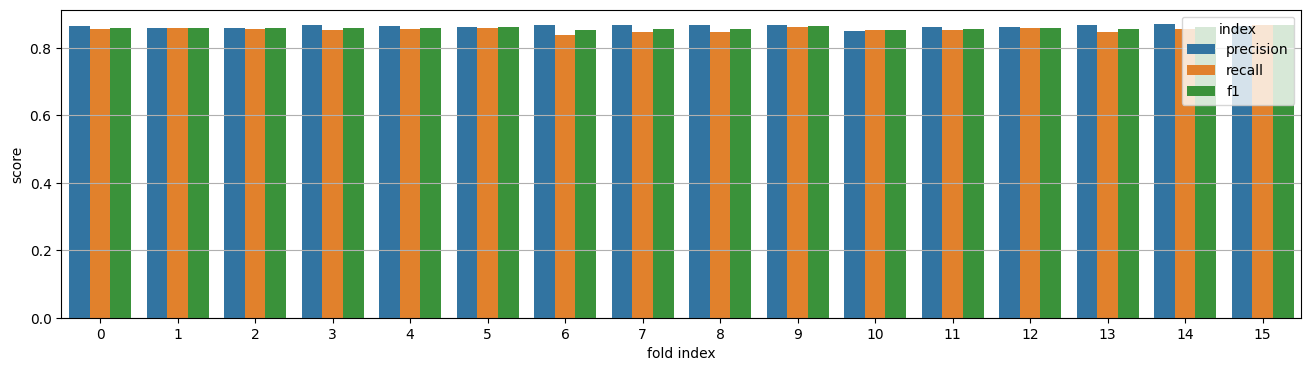

In [20]:
a = all_metrics.reset_index().melt(id_vars='index')
a['variable'] = a['variable'].astype(int)
plt.figure(figsize=(16,4))
plt.grid()
sns.barplot(data=a,x='variable',y='value',hue='index')
plt.xlabel('fold index')
plt.ylabel('score')

<AxesSubplot:xlabel='variable', ylabel='value'>

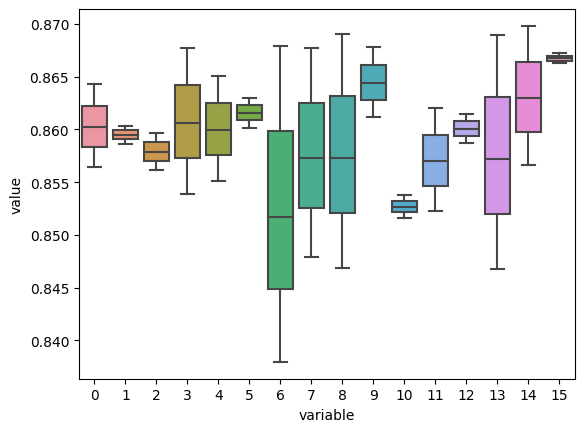

In [21]:
sns.boxplot(data=all_metrics.reset_index().melt(id_vars='index'),x='variable',y='value')

In [ ]:
for i,(train_ids,test_ids) in tqdm(enumerate(folds)):
    X_train,y_train = load_psd_label_pairs_windowed(train_ids)
    X_train,X_dev,y_train,y_dev = train_test_split(X_train,y_train,test_size=.25,shuffle=True,random_state=0)
    trainloader = DataLoader(TensorDataset(X_train,y_train),batch_size=32,shuffle=True)
    devloader = DataLoader(TensorDataset(X_dev,y_dev),batch_size=32,shuffle=True)
    

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=3e-4)

In [ ]:
optimization_loop(model,trainloader,devloader,criterion,optimizer,epochs=10,DEVICE=DEVICE)
# dev loss .2249

In [ ]:
loss,metrics,y_true,y_pred,_ = evaluate(devloader,model,criterion,DEVICE)
cm_grid(y_true=y_true,y_pred=y_pred)
print(metrics)
print(loss)

In [ ]:
loss,metrics,y_true,y_pred,_ = evaluate(testloader,model,criterion,DEVICE)
cm_grid(y_true=y_true,y_pred=y_pred)
print(metrics)
print(loss)